# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

api_key = weather_api_key
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolayevsk-on-amure
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | sooke
Processing Record 8 of Set 1 | bulgan
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | as sulayyil
Processing Record 11 of Set 1 | dunda
Processing Record 12 of Set 1 | birobidzhan
Processing Record 13 of Set 1 | revda
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | odemira
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | malangali
Processing Record 23

Processing Record 36 of Set 4 | choyr
Processing Record 37 of Set 4 | mahina
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | remire-montjoly
Processing Record 40 of Set 4 | huron
Processing Record 41 of Set 4 | kargasok
Processing Record 42 of Set 4 | kavak
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | carolina beach
Processing Record 45 of Set 4 | susuman
Processing Record 46 of Set 4 | island harbour
Processing Record 47 of Set 4 | tazacorte
Processing Record 48 of Set 4 | bilibino
Processing Record 49 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 0 of Set 5 | haiku-pauwela
Processing Record 1 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 2 of Set 5 | kasongo-lunda
Processing Record 3 of Set 5 | zambezi
Processing Record 4 of Set 5 | weiser
Processing Record 5 of Set 5 | kolonia town
Processing Record 6 of Set 5 | constantia
Processing Record 7 of Set 5 | queenstown
Processing Record 8 of Set 5

Processing Record 26 of Set 8 | ta`u
Processing Record 27 of Set 8 | codrington
Processing Record 28 of Set 8 | puerto aysen
Processing Record 29 of Set 8 | ust'-labinsk
Processing Record 30 of Set 8 | yuzhno-kurilsk
Processing Record 31 of Set 8 | sovetskaya gavan'
Processing Record 32 of Set 8 | tshikapa
Processing Record 33 of Set 8 | kidal
Processing Record 34 of Set 8 | beau vallon
Processing Record 35 of Set 8 | muncie
Processing Record 36 of Set 8 | escanaba
Processing Record 37 of Set 8 | satellite beach
Processing Record 38 of Set 8 | meknes
Processing Record 39 of Set 8 | kununurra
Processing Record 40 of Set 8 | palora
Processing Record 41 of Set 8 | tromso
Processing Record 42 of Set 8 | nizhniy kuranakh
Processing Record 43 of Set 8 | el granada
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | usinsk
Processing Record 46 of Set 8 | tolanaro
Processing Record 47 of Set 8 | inongo
Processing Record 48 of Set 8 | vorkuta
Processing Record 49 of Set 8 |

Processing Record 17 of Set 12 | kalabo
Processing Record 18 of Set 12 | salinas
Processing Record 19 of Set 12 | gokwe
Processing Record 20 of Set 12 | gorom-gorom
Processing Record 21 of Set 12 | luderitz
Processing Record 22 of Set 12 | general toshevo
Processing Record 23 of Set 12 | east grand forks
Processing Record 24 of Set 12 | xenia
Processing Record 25 of Set 12 | muli
Processing Record 26 of Set 12 | saint-louis
Processing Record 27 of Set 12 | ebon
Processing Record 28 of Set 12 | broken hill
Processing Record 29 of Set 12 | puttalam
Processing Record 30 of Set 12 | linqiong
Processing Record 31 of Set 12 | abou el hassan
Processing Record 32 of Set 12 | mawlamyinegyunn
Processing Record 33 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 34 of Set 12 | sterling
Processing Record 35 of Set 12 | zouerate
Processing Record 36 of Set 12 | komsomol'skiy
Processing Record 37 of Set 12 | hefei
Processing Record 38 of Set 12 | barakani
Processing Record 39 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
citydata_df = pd.DataFrame(city_data)

# Show Record Count
citydata_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
citydata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolayevsk-on-amure,53.1406,140.7300,-5.33,84,100,4.27,RU,1699931144
1,ust-nera,64.5667,143.2000,-27.78,97,55,2.30,RU,1699931145
2,invercargill,-46.4000,168.3500,11.68,89,85,6.26,NZ,1699931145
3,anadyr,64.7500,177.4833,-13.72,71,7,12.00,RU,1699931146
4,puerto ayora,-0.7393,-90.3518,23.08,99,90,4.02,EC,1699931147


In [6]:
# Export the City_Data into a csv
citydata_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
citydata_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
citydata_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolayevsk-on-amure,53.1406,140.7300,-5.33,84,100,4.27,RU,1699931144
1,ust-nera,64.5667,143.2000,-27.78,97,55,2.30,RU,1699931145
2,invercargill,-46.4000,168.3500,11.68,89,85,6.26,NZ,1699931145
3,anadyr,64.7500,177.4833,-13.72,71,7,12.00,RU,1699931146
4,puerto ayora,-0.7393,-90.3518,23.08,99,90,4.02,EC,1699931147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

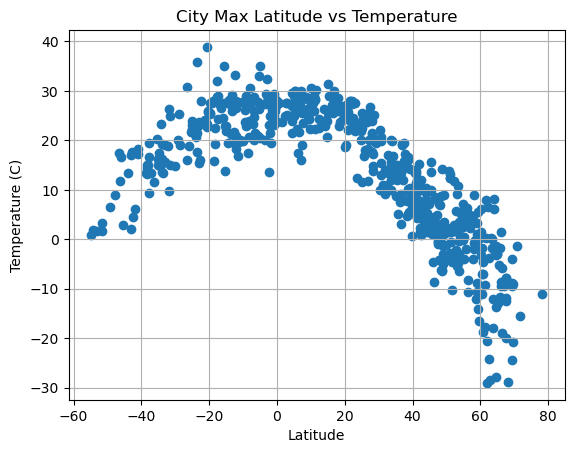

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(citydata_df['Lat'], citydata_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

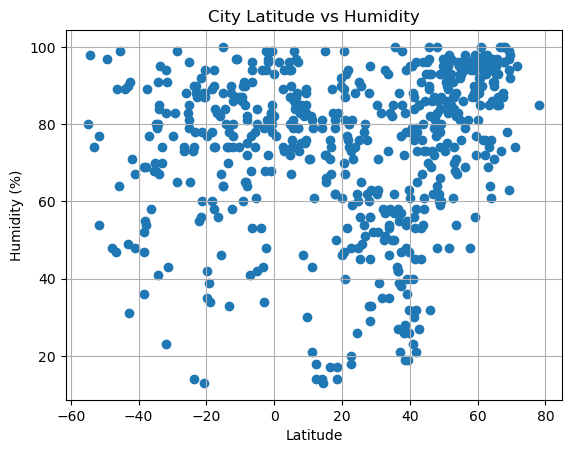

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(citydata_df['Lat'], citydata_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

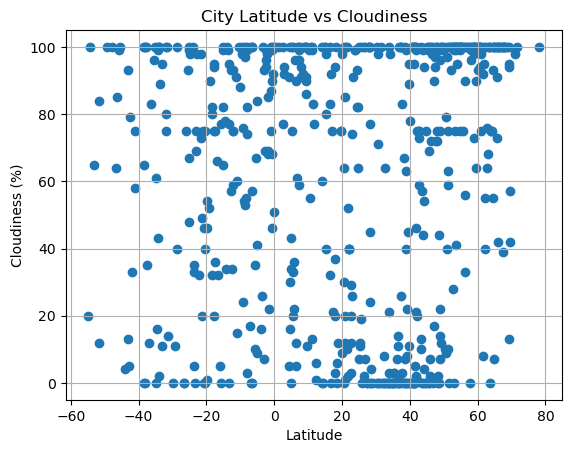

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(citydata_df['Lat'], citydata_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

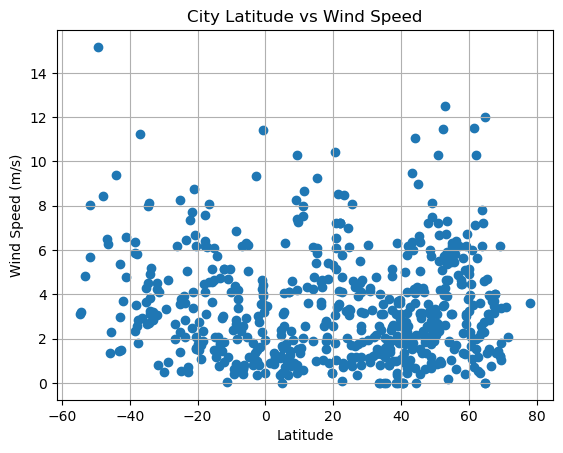

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(citydata_df['Lat'], citydata_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.6688244695602619


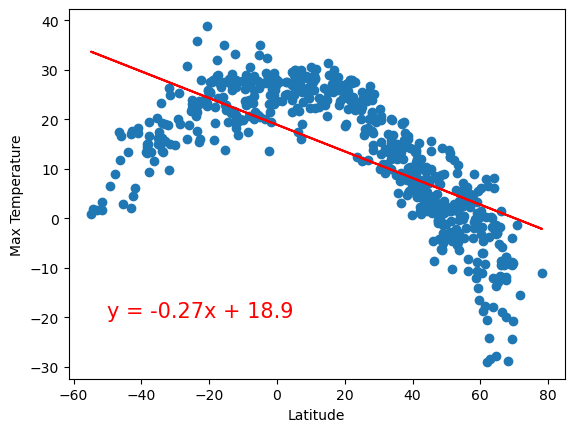

In [12]:
# Define a function to create Linear Regression plots
#Latitude v. Temperature
x_values = citydata_df['Lat']
y_values = citydata_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1258368837333743


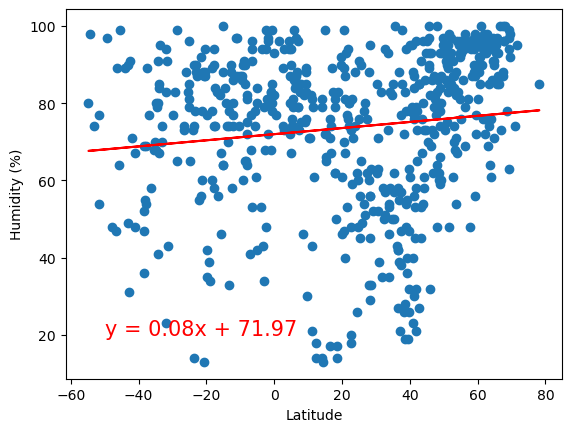

In [16]:
# Define a function to create Linear Regression plots
#Latitude v. Humidity
x_values = citydata_df['Lat']
y_values = citydata_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.0712616732903017


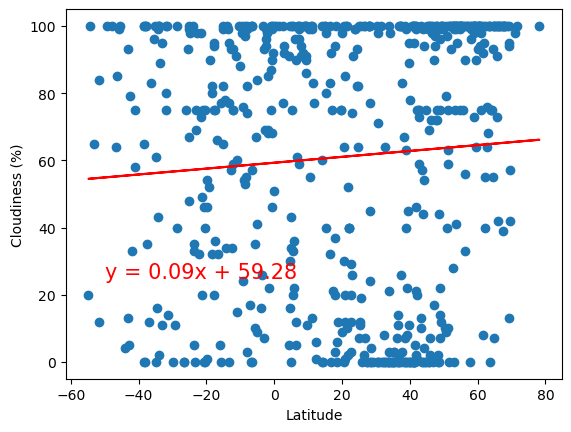

In [17]:
# Define a function to create Linear Regression plots
#Latitude v. Cloudiness
x_values = citydata_df['Lat']
y_values = citydata_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.05741527030252239


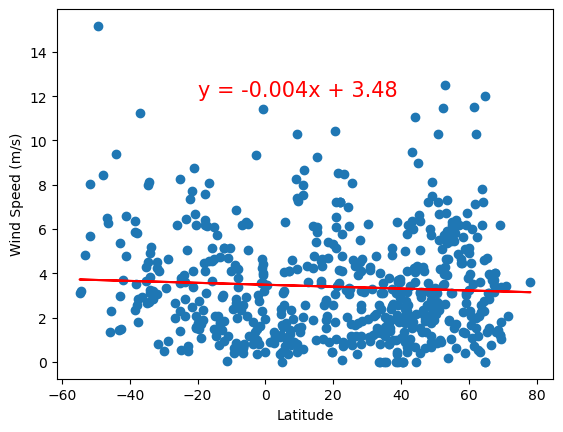

In [21]:
# Define a function to create Linear Regression plots
#Latitude v. Wind Speed
x_values = citydata_df['Lat']
y_values = citydata_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is:{rvalue}")
plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernhem_df = citydata_df[citydata_df['Lat'] >= 0]

# Display sample data
northernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolayevsk-on-amure,53.1406,140.7300,-5.33,84,100,4.27,RU,1699931144
1,ust-nera,64.5667,143.2000,-27.78,97,55,2.30,RU,1699931145
3,anadyr,64.7500,177.4833,-13.72,71,7,12.00,RU,1699931146
6,sooke,48.3746,-123.7276,8.76,79,2,2.57,CA,1699931148
7,bulgan,48.8125,103.5347,-6.32,66,75,0.66,MN,1699931149


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernhem_df = citydata_df[citydata_df['Lat'] < 0]

# Display sample data
southernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,11.68,89,85,6.26,NZ,1699931145
4,puerto ayora,-0.7393,-90.3518,23.08,99,90,4.02,EC,1699931147
5,adamstown,-25.0660,-130.1015,23.01,85,100,8.28,PN,1699931148
8,ancud,-41.8697,-73.8203,6.06,71,33,3.70,CL,1699931150
10,dunda,-8.1167,34.2500,20.61,81,99,0.56,TZ,1699931151


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8966694178834529


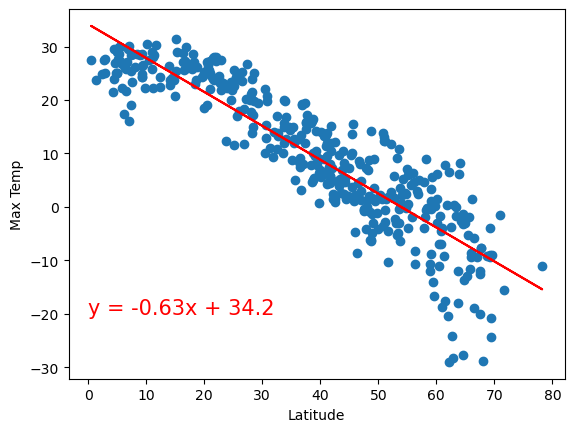

In [24]:
# Linear regression on Northern Hemisphere
x_values = northernhem_df['Lat']
y_values = northernhem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7175753095715072


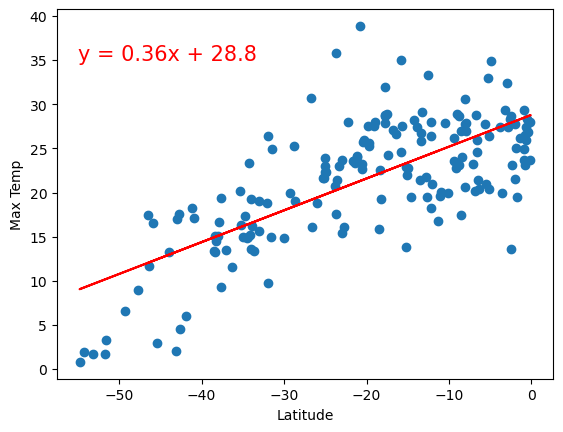

In [25]:
# Linear regression on Southern Hemisphere
x_values = southernhem_df['Lat']
y_values = southernhem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.27318522236046117


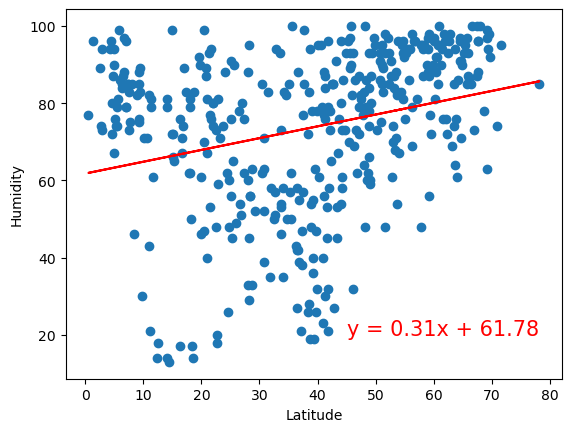

In [28]:
# Northern Hemisphere
x_values = northernhem_df['Lat']
y_values = northernhem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.1303093859126441


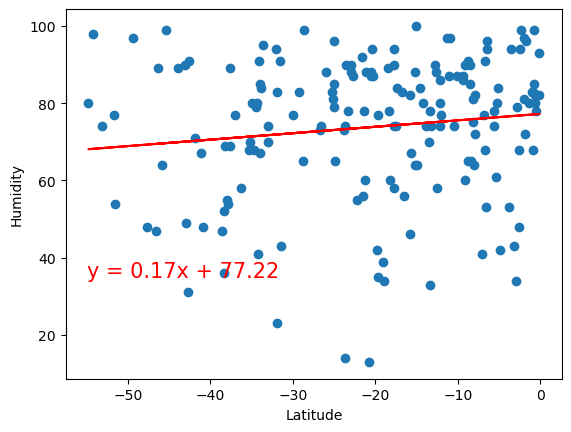

In [29]:
# Southern Hemisphere
x_values = southernhem_df['Lat']
y_values = southernhem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
In the norther hemisphere, the humidity increases as it gets further from the equator.  I would have anticipated that the humidity would decrease when getting further from the equator.
However in the souther hemisphere, humidity was on spot to my expectations.  While in the southern hemisphere, as you approach the equator, the humidity increases!

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.1959637310333457


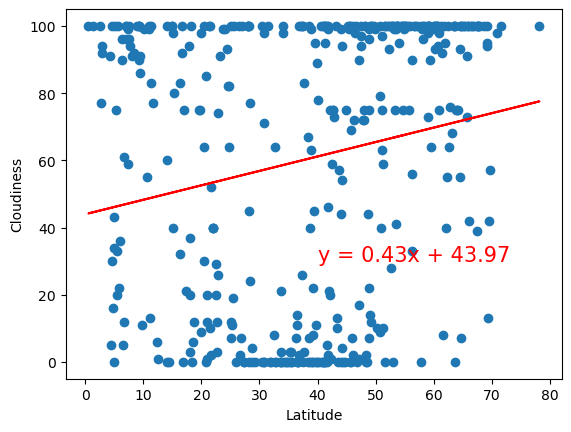

In [30]:
# Northern Hemisphere
x_values = northernhem_df['Lat']
y_values = northernhem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.06756488091607797


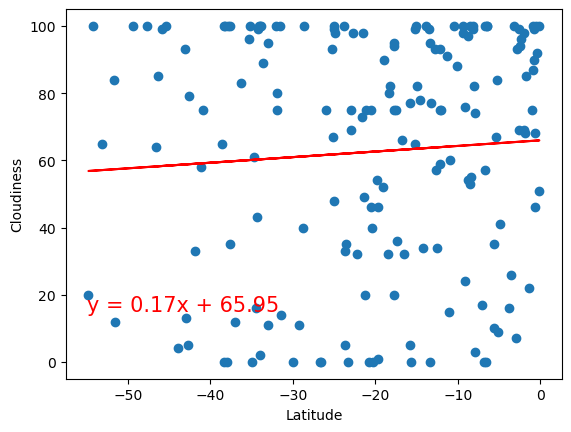

In [31]:
# Southern Hemisphere
x_values = southernhem_df['Lat']
y_values = southernhem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
After looking at the data for humidity, the cloudiness plots/linregression aligned with my expectations.  In the northern hemisphere, the cloudiness increases the further north you go.  In the southern hemisphere, the cloudiness increase as you get closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.09159982100913655


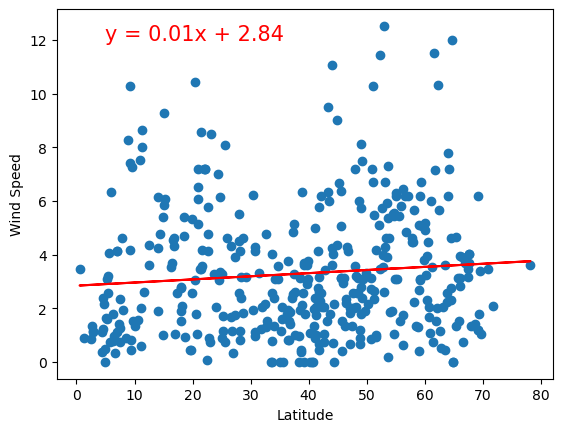

In [32]:
# Northern Hemisphere
x_values = northernhem_df['Lat']
y_values = northernhem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.28495132069624896


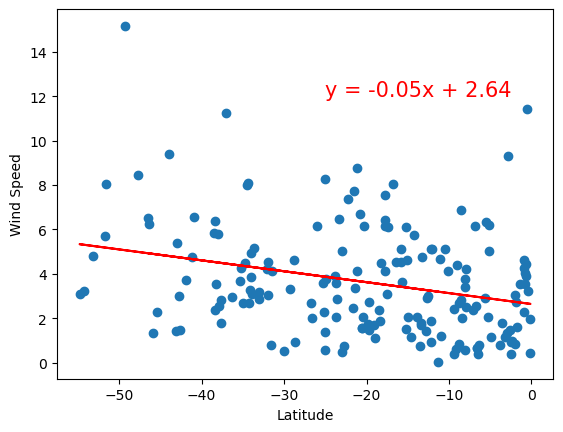

In [33]:
# Southern Hemisphere
x_values = southernhem_df['Lat']
y_values = southernhem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The equator has the lowest wind speed.  In the northern hemisphere, the wind speed increases very slightly (0.01) while moving north away from the equator.
In the southern hemisphere, as you approach the equator, the wind speed decreases slightly (-0.06).